# Analysing Mental Health of Employees in Tech Industry
   *This project is a part of T5 Data Science Bootcamp provided by SDAIA Academy*

Mental health affects our life in many aspects. It affects how we feel, think, act towards anything, and how we relate and communicate with others. It plays a major role in our emotional and social well-being. In our work community, mental health can also affects our productivity and engagement. The goal of this project is to analyse the mental health of the employees who work in tech companies according to a survey that is published every year by OSMI (Open Sourcing Mental Illness), which is a non-profit corporation that aims to raise awareness and change how we talk about our mental health as workers in tech communities. The survey introduces questions about mental health and it is answered by tech employees across the world. I will be using the responses from these surveys for analysing and determine whether an employee suffer from mental illness or not.

# Cleaning and Exploratory Data Analysis 


In the previous notebook, we collected our dataset from different surveys and organized each column to be an answer to a question. We also renamed the columns to indicate the domain of the question instead of having the question itself as a column name, which will be easier to read, access, and used in the model.

In addition, since the answers are collected from multiple surveys, there are a few differences in answers that we need to clean and map to a specific set of answers *(e.g. 'No' and 'Never' will be 'No', 'male', 'Male' and 'M' will be 'm')*.

So the final column names with their values will be as follows:

- **self_employed**: Are you self employed?
- **affected_productivity**: Do you believe your productivity is ever affected by a mental health disorder?
- **care_about_mental_health**: Do you feel that your employer takes mental health as seriously as physical health?
- **family_history**: Do you have a family history of mental illness?
- **no_employees**: How many numbers of employees in you company?
- **IT_related_job**: is your job related to IT?
- **tech_industry_support**: Do you think that the tech industry supports mental health?
- **race**: What is your race?
- **disorders**: What disorders do you have / been diagnosed with?
- **age**: What is your age?
- **gender**: What is your gender?
- **country**: What is your country?
- **privacy**: Is your anonymity protected if you choose to take advantage of mental health resources?
- **treated**: Have you ever been treated from / diagnosed with mental illness?
- **work_interfere**: Do you think or does your mental illness interfere with your work?
- **care_coverage**: Do you know the options for mental health care provided in your work?
- **talk_to_coworkers**: Do you discuss / Have you ever discussed your mental health with your co-workers?
- **talk_to_supervisors**: Do you discuss / Have you ever discussed your mental health with your supervisors?
- **tech_organization**: Is your company primary a tech organization?
- **interview_physical**: Would you be willing to bring up a physical health disorder with a potential employer in an interview?
- **interview_mental**: Would you be willing to bring up a mental health disorder with a potential employer in an interview
- **reveal_disorder**: Do you feel comfortable revealing your mental illness with clients or buisness partners?
- **reveal_neg_impact**: Do you believe revealing mental health disorder will impact you negatively?
- **neg_consequences**: Do you think that discussing or having a mental health disorder at work would result in negative consequences?
- **career_damage**: Do you think being identified as a person with a mental health disorder affects your career?
- **wellness_program**: Has your employer ever discussed mental health as part of an employee wellness program?
- **shared_resources**: Does your employer offer resources to learn more about mental health concerns and options for seeking help?
- **mental_importance**: Overall how much importance does your work place on mental health?
- **physical_importance**: Overall how much importance does your work place on physical health?
- **remote_work**: Do you work remotely?



In [260]:
# Import needed libraries for cleaning and EDA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [261]:
# Read the csv file containing our dataset
df = pd.read_csv('mental_health_data/mental_health_in_tech_survey_combined.csv', index_col=0)

In [262]:
# Take a look at our data
df.head()

,self_employed,affected_productivity,care_about_mental_health,family_history,no_employees,IT_related_job,tech_industry_support,race,disorders,age,...,interview_mental,reveal_disorder,reveal_neg_impact,neg_consequences,career_damage,wellness_program,shared_resources,mental_importance,physical_importance,remote_work
0,NaN,NaN,Yes,No,6-25,NaN,NaN,NaN,NaN,37.0,...,No,NaN,NaN,No,NaN,No,Yes,NaN,NaN,No
1,NaN,NaN,Don't know,No,More than 1000,NaN,NaN,NaN,NaN,44.0,...,No,NaN,NaN,Maybe,NaN,Don't know,Don't know,NaN,NaN,No
2,NaN,NaN,No,No,6-25,NaN,NaN,NaN,NaN,32.0,...,Yes,NaN,NaN,No,NaN,No,No,NaN,NaN,No
3,NaN,NaN,No,Yes,26-100,NaN,NaN,NaN,NaN,31.0,...,Maybe,NaN,NaN,Yes,NaN,No,No,NaN,NaN,No
4,NaN,NaN,Don't know,No,100-500,NaN,NaN,NaN,NaN,31.0,...,Yes,NaN,NaN,No,NaN,Don't know,Don't know,NaN,NaN,Yes


In [264]:
# check types and some other informmation about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4398 entries, 0 to 4397
Data columns (total 30 columns):
self_employed               4380 non-null object
affected_productivity       529 non-null object
care_about_mental_health    2406 non-null object
family_history              4398 non-null object
no_employees                3869 non-null object
IT_related_job              1726 non-null object
tech_industry_support       1703 non-null float64
race                        1052 non-null object
disorders                   1998 non-null object
age                         4396 non-null float64
gender                      4372 non-null object
country                     4396 non-null object
privacy                     4332 non-null object
treated                     4398 non-null object
work_interfere              4134 non-null object
care_coverage               4398 non-null object
talk_to_coworkers           4332 non-null object
talk_to_supervisors         4332 non-null object
tech_organ

In [265]:
# check for null values
df.isnull().sum()

self_employed                 18
affected_productivity       3869
care_about_mental_health    1992
family_history                 0
no_employees                 529
IT_related_job              2672
tech_industry_support       2695
race                        3346
disorders                   2400
age                            2
gender                        26
country                        2
privacy                       66
treated                        0
work_interfere               264
care_coverage                  0
talk_to_coworkers             66
talk_to_supervisors           66
tech_organization            315
interview_physical             0
interview_mental               0
reveal_disorder             3869
reveal_neg_impact           3869
neg_consequences            1705
career_damage               2760
wellness_program             529
shared_resources             529
mental_importance           2721
physical_importance         2721
remote_work                 1705
dtype: int

## 1- Cleaning Dataset

### a - Dealing with null values

We can see that there are a lot of null values in some columns and a few in others, so I decided to drop the columns that are more than half of their values are null, fill some other columns with their most frequent value, and then use dropna() to remove any row with null values.

In [266]:
# Drop columns that more than half of their values are null
df = df.drop(['IT_related_job', 'care_about_mental_health', 'physical_importance', 'mental_importance', 'career_damage', 'reveal_disorder', 'reveal_neg_impact', 'disorders', 'race', 'tech_industry_support', 'affected_productivity'], axis=1)

In [267]:
# Check null values after dropping columns
df.isnull().sum()

self_employed            18
family_history            0
no_employees            529
age                       2
gender                   26
country                   2
privacy                  66
treated                   0
work_interfere          264
care_coverage             0
talk_to_coworkers        66
talk_to_supervisors      66
tech_organization       315
interview_physical        0
interview_mental          0
neg_consequences       1705
wellness_program        529
shared_resources        529
remote_work            1705
dtype: int64

In [268]:
# Fill some columns with their most frequest value
df['no_employees'] = df['no_employees'].fillna(df['no_employees'].mode().iloc[0])
df['gender'] = df['gender'].fillna(df['gender'].mode().iloc[0])
df['privacy'] = df['privacy'].fillna(df['privacy'].mode().iloc[0])
df['work_interfere'] = df['work_interfere'].fillna(df['work_interfere'].mode().iloc[0])
df['tech_organization'] = df['tech_organization'].fillna(df['tech_organization'].mode().iloc[0])
df['talk_to_coworkers'] = df['talk_to_coworkers'].fillna(df['talk_to_coworkers'].mode().iloc[0])
df['talk_to_supervisors'] = df['talk_to_supervisors'].fillna(df['talk_to_supervisors'].mode().iloc[0])
df['wellness_program'] = df['wellness_program'].fillna(df['wellness_program'].mode().iloc[0])
df['shared_resources'] = df['shared_resources'].fillna(df['shared_resources'].mode().iloc[0])

In [269]:
# Check null values after filling
df.isnull().sum()

self_employed            18
family_history            0
no_employees              0
age                       2
gender                    0
country                   2
privacy                   0
treated                   0
work_interfere            0
care_coverage             0
talk_to_coworkers         0
talk_to_supervisors       0
tech_organization         0
interview_physical        0
interview_mental          0
neg_consequences       1705
wellness_program          0
shared_resources          0
remote_work            1705
dtype: int64

In [270]:
# Drop rows that have null values
df.dropna(axis=0, inplace=True)

In [271]:
# Check null values after dropping rows
df.isnull().sum()

self_employed          0
family_history         0
no_employees           0
age                    0
gender                 0
country                0
privacy                0
treated                0
work_interfere         0
care_coverage          0
talk_to_coworkers      0
talk_to_supervisors    0
tech_organization      0
interview_physical     0
interview_mental       0
neg_consequences       0
wellness_program       0
shared_resources       0
remote_work            0
dtype: int64

In [272]:
# Let's take a look at the data after removing null values
df.head()

,self_employed,family_history,no_employees,age,gender,country,privacy,treated,work_interfere,care_coverage,talk_to_coworkers,talk_to_supervisors,tech_organization,interview_physical,interview_mental,neg_consequences,wellness_program,shared_resources,remote_work
18,Yes,Yes,1-5,46.0,male,United States,Yes,No,Sometimes,Not sure,Yes,Yes,Yes,Yes,No,No,Yes,Don't know,Yes
19,Yes,Yes,6-25,36.0,Male,France,Yes,No,Sometimes,No,Some of them,Some of them,Yes,Maybe,Maybe,No,Yes,No,Yes
20,No,Yes,100-500,29.0,Male,United States,No,Yes,Sometimes,Yes,Some of them,Some of them,Yes,No,No,Maybe,No,No,No
21,Yes,No,1-5,31.0,male,United States,Yes,No,Never,No,Some of them,Some of them,Yes,Maybe,No,No,No,No,Yes
22,No,No,26-100,46.0,Male,United States,Don't know,Yes,Often,Yes,Some of them,Yes,Yes,Maybe,No,Maybe,No,No,Yes


### b - Dealing with different values that indicate the same answer

Now that our dataset is clean, let us rearrange and organize the values that indicates the same answer (e.g. 'No' and 'Never' will be 'No', 'male', 'Male' and 'M' will be 'm') to have a better view and understanding when we visualise our data.

In [273]:
# Create an answer dictionary to map different answers to common meaning
answers_dict = {
    'Yes': 'Yes',
    'Yes, always': 'Yes',
    'No': 'No', 
    'Sometimes': 'Sometimes',
    'Never': 'No',
    'Always': 'Yes',
    '1': 'Yes', 
    '0': 'No',
    '1.0': 'Yes', 
    '0.0': 'No',
    'Don\'t know': 'I do not know',
    'I don\'t know': 'I do not know',
    'Maybe': 'Maybe',
    'None of them': 'No',
    'Some of them': 'Yes',
    'Yes, they do': 'Yes',
    'Yes, all of them': 'Yes',
    'Yes, I think they would': 'Yes',
    'No, I don\'t think they would': 'No',
    'No, they do not': 'No',
    'Yes, at all of my previous employers': 'Yes',
    'Some of them': 'Sometimes',
    'Some of my previous employers': 'Sometimes',
    'Some of my previous supervisors': 'Sometimes',
    'No, at none of my previous employers': 'No',
    'N/A (not currently aware)': 'No',
    'I was aware of some': 'Yes',
    'I am not sure': 'No',
    'Yes, I was aware of all of them': 'Yes',
    'No, I only became aware later': 'No',
    'Not sure': 'No',
    'Not eligible for coverage / N/A': 'No',  
}

In [274]:
# Let's see how this will work: 
# First: see the unique values for self_employed column
# Values Yes and 1 both indicate Yes, same with No and 0.
df['self_employed'].unique()

array(['Yes', 'No', '0', '1'], dtype=object)

In [275]:
# Map the values in the column with our created dictionary
df['self_employed'] = df['self_employed'].map(answers_dict)

In [276]:
# Now check the unique values again to see if we have organized answers
df['self_employed'].unique()

array(['Yes', 'No'], dtype=object)

In [277]:
# let's apply this mapping to all columns that need to organize answers
df['privacy'] = df['privacy'].map(answers_dict)
df['care_coverage'] = df['care_coverage'].map(answers_dict)
df['talk_to_coworkers'] = df['talk_to_coworkers'].map(answers_dict)
df['talk_to_supervisors'] = df['talk_to_supervisors'].map(answers_dict)
df['tech_organization'] = df['tech_organization'].map(answers_dict)
df['neg_consequences'] = df['neg_consequences'].map(answers_dict)
df['wellness_program'] = df['wellness_program'].map(answers_dict)
df['shared_resources'] = df['shared_resources'].map(answers_dict)
df['remote_work'] = df['remote_work'].map(answers_dict)
df['family_history'] = df['family_history'].map(answers_dict)

In [278]:
# Now, gender needs some special handilation regarding answers. 
# Because its field in the surveys was accepting any inputs from the user we can see that we have different values
df['gender'].unique()

array(['male', 'Male', 'Female', 'female', 'M', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means',
       'I identify as female.', 'female ', 'Bigender',
       'Female assigned at birth ', 'man', 'fm', 'Cis female ',
       'Transitioned, M2F', 'Genderfluid (born female)',
       'Other/Transfeminine', 'Female or Multi-Gender Femme',
       'female/woman', 'Cis male', 'Male.', 'Androgynous',
       'male 9:1 female, roughly', 

In [279]:
# let's fix this values by first make all letters lowercase
df['gender'] = df['gender'].apply(lambda x: x.lower())

In [280]:
# then replace any string that has 'female', 'woman', or 'f' with 'f'
# and replace any string that has 'male', 'man', or 'm' with 'm'
# if the string did not fall under any condition; make it None
df['gender'] = df['gender'].apply(lambda x: 'f' if 'female' in x or 'woman' in x or 'f' in x or 'femme' in x else ('m' if 'male' in x or 'man' in x or 'm' in x else None))

In [281]:
# Now we will have two values 'm' for Male and 'f' for Female.
df['gender'].unique()

array(['m', 'f', None], dtype=object)

In [282]:
# Because some values didn't match male and female conditions we had some null values again
# Let's drop them
df.dropna(axis=0, inplace=True)

For the our target variable (whether the employee treated from a mental issue or not), we need to have two values only: Yes and No. 

In [283]:
df['treated'].unique()

array(['No', 'Yes', 'Maybe'], dtype=object)

In [284]:
df['treated'] = df['treated'].map({'Yes': 'Yes' ,'No': 'No', 'Maybe': 'No'})

In [285]:
# Check the percentage of each value occuring in the column
df['treated'].value_counts(normalize=True) * 100

No     55.446293
Yes    44.553707
Name: treated, dtype: float64

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2644 entries, 18 to 2691
Data columns (total 19 columns):
self_employed          2644 non-null object
family_history         2644 non-null object
no_employees           2644 non-null object
age                    2644 non-null float64
gender                 2644 non-null object
country                2644 non-null object
privacy                2644 non-null object
treated                2644 non-null object
work_interfere         2644 non-null object
care_coverage          2644 non-null object
talk_to_coworkers      2644 non-null object
talk_to_supervisors    2644 non-null object
tech_organization      2644 non-null object
interview_physical     2644 non-null object
interview_mental       2644 non-null object
neg_consequences       2644 non-null object
wellness_program       2644 non-null object
shared_resources       2644 non-null object
remote_work            2644 non-null object
dtypes: float64(1), object(18)
memory usage: 413.1+ KB


In [287]:
# let's see describe for our dataset. We only have one column (age) with numbers
# We can see that there's unusual minimum and maximum values
# Let's fix this by taking record where 17 < age < 100 
df.describe()

,age
count,2644.000000
mean,32.673979
std,36.040194
min,-1726.000000
25%,28.000000
50%,32.000000
75%,37.250000
max,329.000000


In [288]:
# get records with age between 17 and 99
df = df[(17 < df['age']) & (df['age'] < 99)]

In [289]:
# convert age to integers
df['age'] = df['age'].astype(int)

In [290]:
df.describe()

,age
count,2635.000000
mean,33.184820
std,7.812898
min,18.000000
25%,28.000000
50%,32.000000
75%,37.500000
max,74.000000


In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2635 entries, 18 to 2691
Data columns (total 19 columns):
self_employed          2635 non-null object
family_history         2635 non-null object
no_employees           2635 non-null object
age                    2635 non-null int32
gender                 2635 non-null object
country                2635 non-null object
privacy                2635 non-null object
treated                2635 non-null object
work_interfere         2635 non-null object
care_coverage          2635 non-null object
talk_to_coworkers      2635 non-null object
talk_to_supervisors    2635 non-null object
tech_organization      2635 non-null object
interview_physical     2635 non-null object
interview_mental       2635 non-null object
neg_consequences       2635 non-null object
wellness_program       2635 non-null object
shared_resources       2635 non-null object
remote_work            2635 non-null object
dtypes: int32(1), object(18)
memory usage: 401.4+ KB


## 2 - EDA and Visualizing Dataset

In [303]:
# Set the pallete of seaborn
sns.set_palette('Set2')

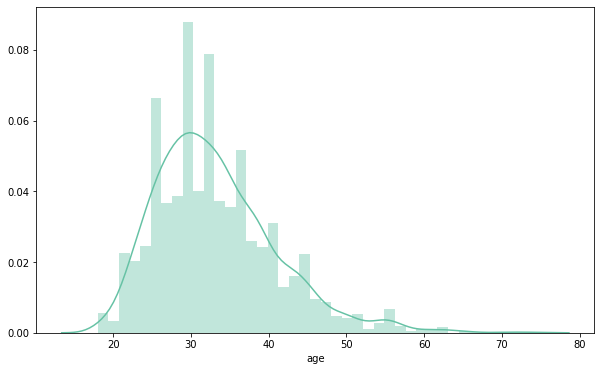

In [251]:
# Plot a distribution of age of respondenats
plt.figure(figsize=[10,6])
sns.distplot(df['age']);

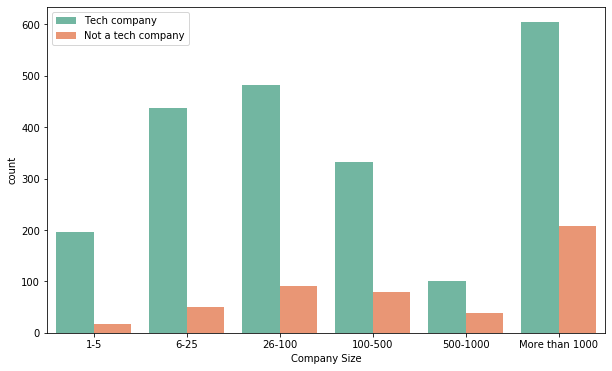

In [252]:
# Company sizes
plt.figure(figsize=[10,6])
sns.countplot(x=df['no_employees'], hue=df['tech_organization'], 
              order=['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000'])
plt.xlabel('Company Size')
plt.legend(['Tech company', 'Not a tech company']);

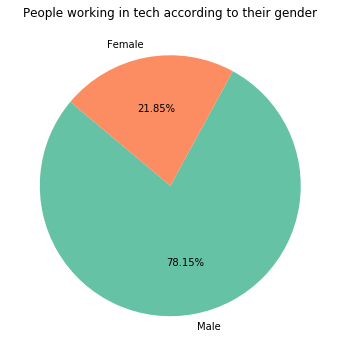

In [253]:
# People working in tech according to their gender
plt.figure(figsize=[10,6])
tech_people = df[df['tech_organization'] == 'Yes']['gender'].count()
males = df[(df['tech_organization'] == 'Yes') & (df['gender'] == 'm')]['gender'].count()
females = df[(df['tech_organization'] == 'Yes') & (df['gender'] == 'f')]['gender'].count()

labels = 'Male', 'Female'
sizes = [males / tech_people, females / tech_people]

plt.pie(sizes, labels=labels, autopct='%.2f%%', shadow=False, startangle=140)
plt.title('People working in tech according to their gender');

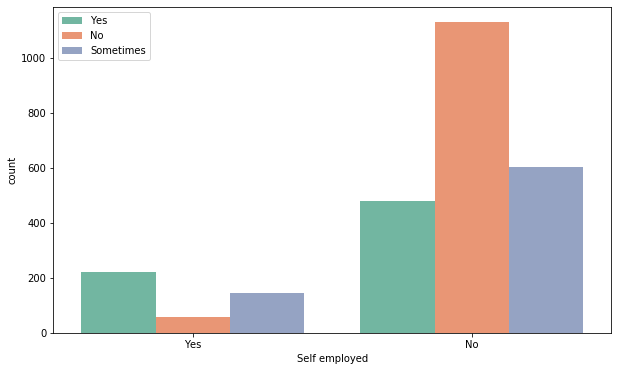

In [257]:
# Do people work on-site or remotely?
plt.figure(figsize=[10,6])
sns.countplot(x = df['self_employed'], hue = df['remote_work']);
plt.legend(loc='upper left')
plt.xlabel('Self employed');

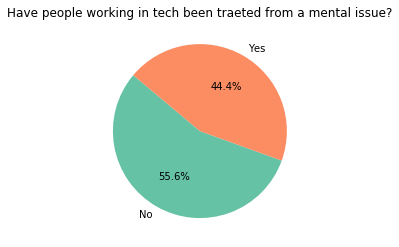

In [258]:
# Have people working in tech been traeted from a mental issue?
treated_techs = df[df['tech_organization'] == 'Yes']['treated'].count()
no_treated = df[(df['tech_organization'] == 'Yes') & (df['treated'] == 'No')]['treated'].count()
yes_treated = df[(df['tech_organization'] == 'Yes') & (df['treated'] == 'Yes')]['treated'].count()

labels = 'No', 'Yes'
sizes = [no_treated / treated_techs, yes_treated / treated_techs]

plt.pie(sizes, labels=labels, autopct='%.2f%%', shadow=False, startangle=140)
plt.title('Have people working in tech been traeted from a mental issue?');

<Figure size 1152x432 with 0 Axes>

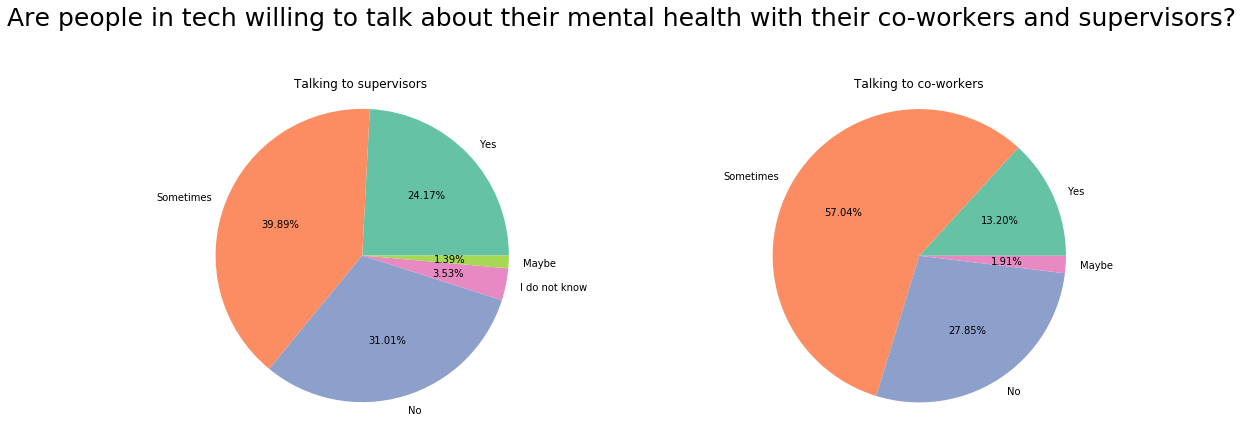

In [302]:
# Are people in tech talked / willing to talk about their mental health with their co-workers and supervisors?

plt.figure(figsize = (16,6))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0)
fig.suptitle('Are people in tech talked / willing to talk about their mental health with their co-workers and supervisors?', fontsize = 25, y=1.08)

# talking to supervisors
s_talk = df[df['tech_organization'] == 'Yes']['talk_to_supervisors'].count()
s_no_talk = df[(df['tech_organization'] == 'Yes') & (df['talk_to_supervisors'] == 'No')]['talk_to_supervisors'].count()
s_yes_talk = df[(df['tech_organization'] == 'Yes') & (df['talk_to_supervisors'] == 'Yes')]['talk_to_supervisors'].count()
s_sometimes_talk = df[(df['tech_organization'] == 'Yes') & (df['talk_to_supervisors'] == 'Sometimes')]['talk_to_supervisors'].count()
s_dk_talk = df[(df['tech_organization'] == 'Yes') & (df['talk_to_supervisors'] == 'I do not know')]['talk_to_supervisors'].count()
s_maybe_talk = df[(df['tech_organization'] == 'Yes') & (df['talk_to_supervisors'] == 'Maybe')]['talk_to_supervisors'].count()

s_labels = 'Yes', 'Sometimes', 'No', 'I do not know', 'Maybe'
s_sizes = [s_yes_talk / s_talk, s_sometimes_talk / s_talk, s_no_talk / s_talk, s_dk_talk / s_talk, s_maybe_talk / s_talk]

# talking to coworkers
c_talk = df[df['tech_organization'] == 'Yes']['talk_to_coworkers'].count()
c_no_talk = df[(df['tech_organization'] == 'Yes') & (df['talk_to_coworkers'] == 'No')]['talk_to_coworkers'].count()
c_yes_talk = df[(df['tech_organization'] == 'Yes') & (df['talk_to_coworkers'] == 'Yes')]['talk_to_coworkers'].count()
c_sometimes_talk = df[(df['tech_organization'] == 'Yes') & (df['talk_to_coworkers'] == 'Sometimes')]['talk_to_coworkers'].count()
c_maybe_talk = df[(df['tech_organization'] == 'Yes') & (df['talk_to_coworkers'] == 'Maybe')]['talk_to_coworkers'].count()

c_labels = 'Yes', 'Sometimes', 'No', 'Maybe'
c_sizes = [c_yes_talk / c_talk, c_sometimes_talk / c_talk, c_no_talk / c_talk, c_maybe_talk / c_talk]

ax1.pie(s_sizes, labels=s_labels, autopct='%.2f%%', shadow=False);
ax1.axis('equal')
ax1.set_title('Talking to supervisors');

ax2.pie(c_sizes, labels=c_labels, autopct='%.2f%%', shadow=False);
ax2.axis('equal')
ax2.set_title('Talking to co-workers');

# Modelling

In [399]:
# Import needed modules for modelling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [400]:
# get a copy of our data
df_copied = df.copy()
df_copied.head()

,self_employed,family_history,no_employees,age,gender,country,privacy,treated,work_interfere,care_coverage,talk_to_coworkers,talk_to_supervisors,tech_organization,interview_physical,interview_mental,neg_consequences,wellness_program,shared_resources,remote_work
18,Yes,Yes,1-5,46,m,United States,Yes,No,Sometimes,No,Yes,Yes,Yes,Yes,No,No,Yes,I do not know,Yes
19,Yes,Yes,6-25,36,m,France,Yes,No,Sometimes,No,Sometimes,Sometimes,Yes,Maybe,Maybe,No,Yes,No,Yes
20,No,Yes,100-500,29,m,United States,No,Yes,Sometimes,Yes,Sometimes,Sometimes,Yes,No,No,Maybe,No,No,No
21,Yes,No,1-5,31,m,United States,Yes,No,Never,No,Sometimes,Sometimes,Yes,Maybe,No,No,No,No,Yes
22,No,No,26-100,46,m,United States,I do not know,Yes,Often,Yes,Sometimes,Yes,Yes,Maybe,No,Maybe,No,No,Yes


In [401]:
# Create an answer dictionary to map different answers to common meaning
answers_dict_modelling = {
    'Yes' : 1.0,
    'No': 0.0, 
    'Sometimes': 0.5,
    'I do not know': 0.2,
    'Maybe': 0.3,
}

In [402]:
# for all columns that have common answers 
for col in df_copied.columns:
    if col not in ['no_employees', 'age', 'gender', 'country', 'work_interfere']:
        df_copied[col] = df_copied[col].map(answers_dict_modelling)

df_copied.head()

,self_employed,family_history,no_employees,age,gender,country,privacy,treated,work_interfere,care_coverage,talk_to_coworkers,talk_to_supervisors,tech_organization,interview_physical,interview_mental,neg_consequences,wellness_program,shared_resources,remote_work
18,1.0,1.0,1-5,46,m,United States,1.0,0.0,Sometimes,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.2,1.0
19,1.0,1.0,6-25,36,m,France,1.0,0.0,Sometimes,0.0,0.5,0.5,1.0,0.3,0.3,0.0,1.0,0.0,1.0
20,0.0,1.0,100-500,29,m,United States,0.0,1.0,Sometimes,1.0,0.5,0.5,1.0,0.0,0.0,0.3,0.0,0.0,0.0
21,1.0,0.0,1-5,31,m,United States,1.0,0.0,Never,0.0,0.5,0.5,1.0,0.3,0.0,0.0,0.0,0.0,1.0
22,0.0,0.0,26-100,46,m,United States,0.2,1.0,Often,1.0,0.5,1.0,1.0,0.3,0.0,0.3,0.0,0.0,1.0


In [403]:
# get dummy variables of catogerical ones
cat_feats = ['no_employees', 'gender', 'work_interfere']
final_df = pd.get_dummies(df_copied,columns=cat_feats,drop_first=True)
final_df.head()

,self_employed,family_history,age,country,privacy,treated,care_coverage,talk_to_coworkers,talk_to_supervisors,tech_organization,...,no_employees_100-500,no_employees_26-100,no_employees_500-1000,no_employees_6-25,no_employees_More than 1000,gender_m,work_interfere_Not applicable to me,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes
18,1.0,1.0,46,United States,1.0,0.0,0.0,1.0,1.0,1.0,...,0,0,0,0,0,1,0,0,0,1
19,1.0,1.0,36,France,1.0,0.0,0.0,0.5,0.5,1.0,...,0,0,0,1,0,1,0,0,0,1
20,0.0,1.0,29,United States,0.0,1.0,1.0,0.5,0.5,1.0,...,1,0,0,0,0,1,0,0,0,1
21,1.0,0.0,31,United States,1.0,0.0,0.0,0.5,0.5,1.0,...,0,0,0,0,0,1,0,0,0,0
22,0.0,0.0,46,United States,0.2,1.0,1.0,0.5,1.0,1.0,...,0,1,0,0,0,1,0,1,0,0


In [383]:
# Define X (features) and y (target) and split the data to train and test
X = final_df.drop(['treated', 'country'],axis=1)
y = final_df['treated']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Modelling: Logistic Regression

In [384]:
# Define logestic regressin model, fit train data and get prediction on test
lg = LogisticRegression(random_state=42, solver='liblinear', multi_class='ovr')
lg.fit(X_train, y_train)
predictions = lg.predict(X_test)
print(classification_report(y_test,predictions))
print('Confusion Matrix: \n', confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.77      0.78      0.77       429
         1.0       0.73      0.72      0.73       362

    accuracy                           0.75       791
   macro avg       0.75      0.75      0.75       791
weighted avg       0.75      0.75      0.75       791

Confusion Matrix: 
 [[334  95]
 [100 262]]


### Modelling: Random Forest

In [412]:
# Define random forest model, fit train data and get prediction on test
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)
print(classification_report(y_test,predictions))
print('Accuracy:', round(accuracy_score(y_test, predictions), 5))
print('Confusion Matrix: \n', confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.79      0.75      0.77       429
         1.0       0.72      0.76      0.74       362

    accuracy                           0.75       791
   macro avg       0.75      0.75      0.75       791
weighted avg       0.76      0.75      0.76       791

Accuracy: 0.75474
Confusion Matrix: 
 [[323 106]
 [ 88 274]]
